In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder # Descomentar si 'Sexo' es texto

In [2]:
# Cargar los datos
df = pd.read_csv('Datos.csv')
df.head()

,Sexo,Altura,Mano,Peso
0,M,173,23.0,66.0
1,M,179,26.0,75.0
2,M,163,21.0,59.0
3,M,169,23.0,65.0
4,F,163,20.0,53.0


In [3]:
# 'Sexo' es la columna objetivo, 'Altura', 'Mano', 'Peso' son las características.
X = df[['Altura', 'Mano', 'Peso']]  # Características (features)
y = df['Sexo']                       # Variable objetivo (target)

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 146 muestras
Tamaño del conjunto de prueba: 37 muestras


In [6]:
# Entrenar el modelo Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("\n--- Modelo Gaussian Naive Bayes entrenado ---")


--- Modelo Gaussian Naive Bayes entrenado ---


In [7]:
# Realizar predicciones
y_pred = gnb.predict(X_test)

In [8]:
# --- 5. Mostrar Classification Report ---
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           F       0.91      0.83      0.87        12
           M       0.92      0.96      0.94        25

    accuracy                           0.92        37
   macro avg       0.92      0.90      0.91        37
weighted avg       0.92      0.92      0.92        37



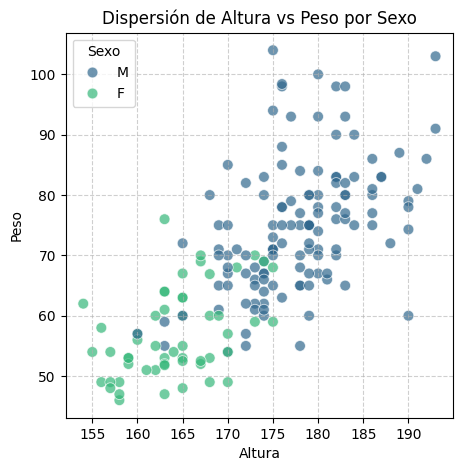

In [10]:
# Demostrar que la Naive Assumption no se cumple (Visualización)
feature1_to_plot = 'Altura'
feature2_to_plot = 'Peso'

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x=feature1_to_plot, y=feature2_to_plot, hue='Sexo', palette='viridis', s=60, alpha=0.7)
plt.title(f'Dispersión de {feature1_to_plot} vs {feature2_to_plot} por Sexo')
plt.xlabel(feature1_to_plot)
plt.ylabel(feature2_to_plot)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Sexo')
plt.show()

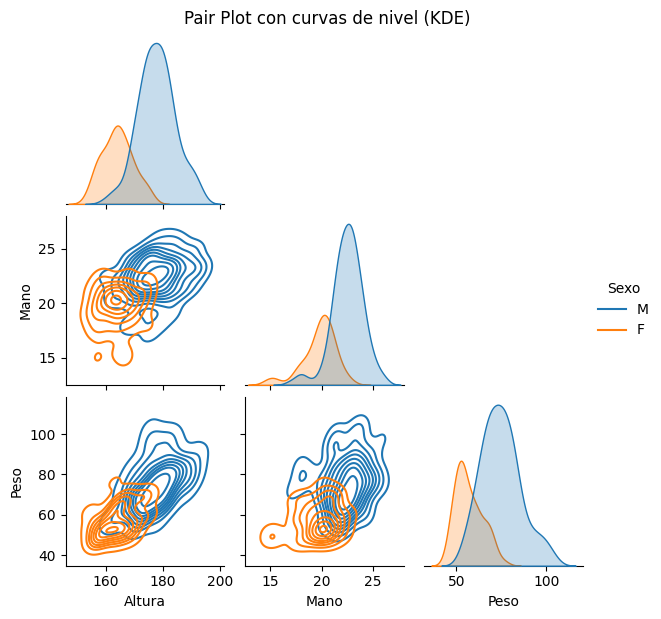

In [14]:
# Demostrar que la Naive Assumption no se cumple (Visualización)
sns.pairplot(df, hue="Sexo", kind="kde", diag_kind="kde", corner=True, plot_kws={"thresh": 0.05}, height=2)
plt.suptitle("Pair Plot con curvas de nivel (KDE)", y=1.02)
plt.show()